In [21]:
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# ladowanie danych
awards = pd.read_csv("./data/awards.csv")
body_builders = pd.read_csv("./data/body_builders.csv")
coaches = pd.read_csv("./data/coaches.csv")
countries = pd.read_csv("./data/countries.csv")
matches = pd.read_csv("./data/matches.csv")
physiotherapists = pd.read_csv("./data/physiotherapists.csv")
players = pd.read_csv("./data/players.csv")
presidents = pd.read_csv("./data/presidents.csv")
press_offices = pd.read_csv("./data/press_offices.csv")
sport_directors = pd.read_csv("./data/sport_directors.csv")
stadiums = pd.read_csv("./data/stadiums.csv")
statisticians = pd.read_csv("./data/statisticians.csv")
team_mangers = pd.read_csv("./data/team_mangers.csv")
teams = pd.read_csv("./data/teams.csv")
transfers = pd.read_csv("./data/transfers.csv")

In [23]:
# customize the data
polish_teams = teams[teams["country_code"] == "PL"]
polish_players = players[players["country_code"] == "PL"]

teams

,team_id,team_name,country_code,n_matches,n_tournaments,town,founded
0,t10001,TSV Reinbek,DE,0,0,Reinbek,\r
1,t10016,Molde VBK,NO,0,0,Molde,\r
2,t10017,Al-Salam,SA,0,4,Qatif,\r
3,t10018,AZS Kraków,PL,0,14,Kraków,\r
4,t10019,Spójnia Warszawa,PL,0,3,Warszawa,1949
...,...,...,...,...,...,...,...
8577,t9979,Bioresurs,UA,23,5,Zhytomyr,\r
8578,t9980,Mechmech,LB,0,3,Biblos,\r
8579,t9987,Tekhnolog-Belogorie,RU,0,11,Belgorod,\r
8580,t9998,Club Talentos Chiclayo,PE,14,3,Chiclayo,2011


<Figure size 1000x1000 with 0 Axes>

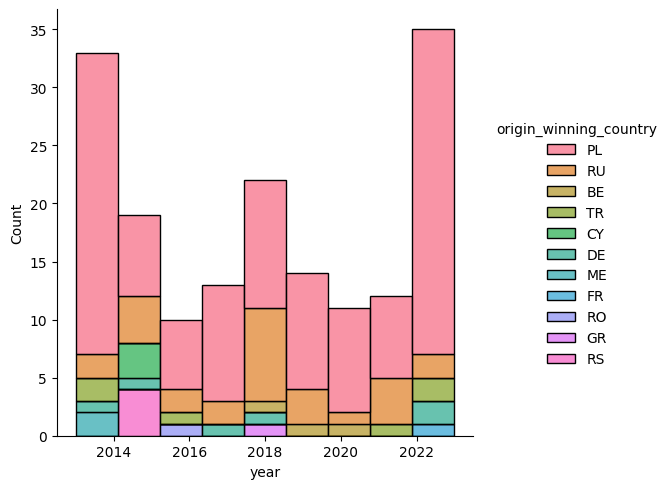

In [24]:
# merge metches with team
matches_have_id = matches["first_team_id"].notna() & matches["second_team_id"].notna()
teams_slice = teams[["country_code", "team_id", "team_name"]]
mt = matches[matches_have_id]
mt = mt.merge(teams_slice, left_on="first_team_id", right_on="team_id").rename(
    columns={"country_code": "first_team_country_code", "team_name": "first_team_name"}
)
mt = mt.merge(teams_slice, left_on="second_team_id", right_on="team_id").rename(
    columns={
        "country_code": "second_team_country_code",
        "team_name": "second_team_name",
    }
)
mt["origin_winning_country"] = np.where(
    mt["n_set_team1"] > mt["n_set_team2"],
    mt["first_team_country_code"],
    mt["second_team_country_code"],
)
mt
# plot histogram of origin_winning country
plt.figure(figsize=(10, 10))

is_polish_team_against_other = ((mt['first_team_country_code'] == 'PL') | (mt['second_team_country_code'] == 'PL')) &  ~((mt['first_team_country_code'] == 'PL') & (mt['second_team_country_code'] == 'PL'))
polish_vs_other = mt[is_polish_team_against_other]
# polish_vs_other
polish_vs_other['year'] = pd.to_datetime(polish_vs_other['date'], format='%m/%d/%Y').dt.year 

polish_vs_other
# plot the wins of teams with origin_winning_country equal to 'PL' on a histogram by year
sns.displot(data=polish_vs_other, x="year", hue="origin_winning_country", multiple="stack")
plt.show()

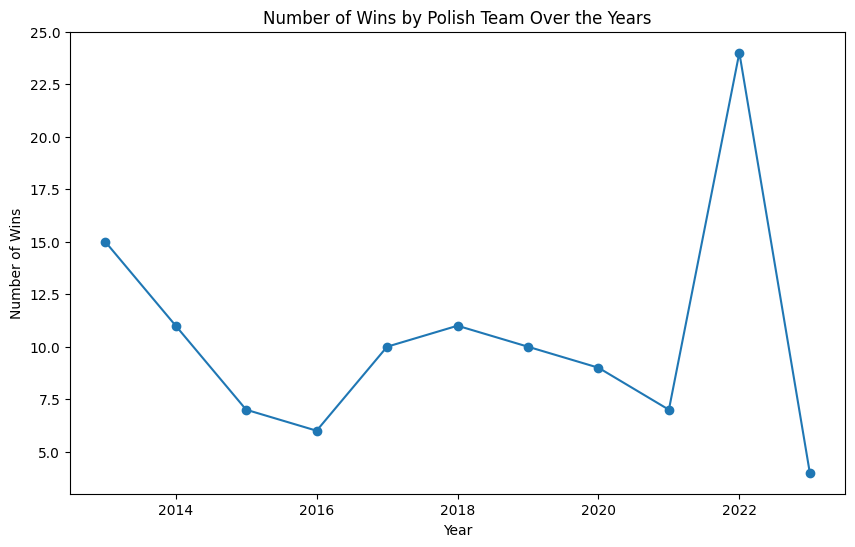

In [30]:
plt.figure(figsize=(10, 6))
polish_wins = polish_vs_other[polish_vs_other['origin_winning_country'] == 'PL']
polish_wins_by_year = polish_wins['year'].value_counts().sort_index()
polish_wins_by_year.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.title('Number of Wins by Polish Team Over the Years')
plt.show()

In [ ]:
awards.head()

In [ ]:
body_builders.head()

In [ ]:
coaches.head()

In [ ]:
countries.head()

In [ ]:
matches.head()

In [ ]:
physiotherapists.head()

In [ ]:
players.head()

In [ ]:
presidents.head()

In [ ]:
press_offices.head()

In [ ]:
sport_directors.head()

In [ ]:
stadiums.head()

In [ ]:
statisticians.head()

In [ ]:
team_mangers.head()

In [ ]:
teams.head()

In [ ]:
transfers.head()